The model achieved an **88% accuracy** in predicting customer attrition. It performed well in identifying customers who stayed (precision: 0.92) and those who left (precision: 0.65). The confusion matrix shows it correctly predicted 293 out of 496 attritions and 2387 out of 2543 non-attritions.

The model used various features to predict customer attrition, including:

- **Demographic Information**: Customer Age, Gender, Dependent Count, Education Level, Marital Status, and Income Category.
- **Account Information**: Months on Book, Total Relationship Count, Credit Limit, and Average Utilization Ratio.
- **Transaction Behavior**: Total Revolving Balance, Average Open to Buy, Total Amount Change (Q4 to Q1), Total Transaction Amount, Total Transaction Count, and Total Count Change (Q4 to Q1).

These features help the model understand patterns and behaviors that might indicate whether a customer is likely to leave or stay.

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

C:\Users\jaspe\AppData\Local\Temp\ipykernel_12256\2290663121.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = label_encoders[column].fit_transform(features[column])
C:\Users\jaspe\AppData\Local\Temp\ipykernel_12256\2290663121.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = label_encoders[column].fit_transform(features[column])
C:\Users\jaspe\AppData\Local\Temp\ipykernel_12256\2290663121.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

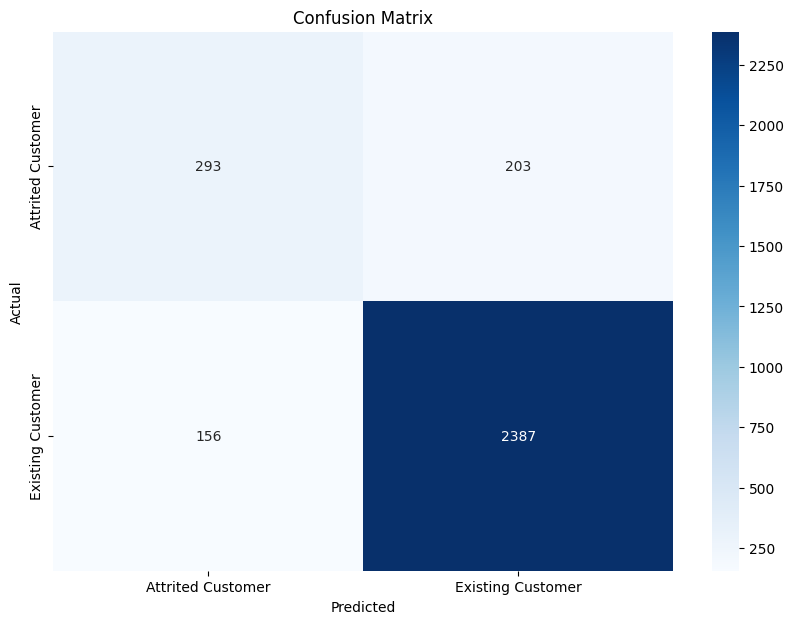

Accuracy: 0.88


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = r'C:\Users\jaspe\OneDrive\Documents\Python\.venv\BankChurners.csv'
Bank = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(Bank.head())

# Select features and target variable
features = Bank[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 
                 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 
                 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
                 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 
                 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
target = Bank['Attrition_Flag']

# Encode categorical variables
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Encode the target variable
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Labels for the confusion matrix
labels = target_encoder.classes_

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, labels)
print(f'Accuracy: {accuracy:.2f}')

